In [95]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import geopandas as gpd
import os
from shapely.geometry import mapping, box
from rasterio.mask import mask
from rasterio.enums import Resampling

In [96]:
df = pd.read_csv("combined_data_final.csv")

In [97]:
df.head(20)

,Year,District,LandCoverClass,PixelCount,Percentage,LandCoverLabel,Precipitation (mm),GPP,PopDensity
0,2010,Aghorat,7,136,2.051282,Open Shrublands,307.30390,1057.805551,11.537289
1,2011,Aghorat,7,168,0.866739,Open Shrublands,183.25092,600.839787,11.797093
2,2012,Aghorat,7,130,0.670691,Open Shrublands,294.59027,1148.920891,12.056898
3,2013,Aghorat,7,151,0.779033,Open Shrublands,223.23447,852.398537,12.316703
4,2014,Aghorat,7,106,0.546871,Open Shrublands,191.02298,762.225361,12.576508
5,2015,Aghorat,7,99,0.510757,Open Shrublands,230.87936,865.736413,12.836312
6,2016,Aghorat,7,91,0.469484,Open Shrublands,272.00308,1356.479309,13.133139
7,2017,Aghorat,7,57,0.294072,Open Shrublands,213.04013,508.619578,13.429965
8,2018,Aghorat,7,32,0.165093,Open Shrublands,218.97380,671.471331,13.726790
9,2019,Aghorat,7,22,0.113502,Open Shrublands,162.61789,804.706166,14.023617


In [98]:
total_area = df['PixelCount'].apply(lambda x: x * 0.25)

In [99]:
# temporal analysis

In [100]:
total_forest_area = df[df['LandCoverLabel'] == 'Grasslands'].groupby('Year')['PixelCount'].sum() * 0.25

In [101]:
forest_change_rate = total_forest_area.pct_change() * 100 
print(forest_change_rate)

Year
2010         NaN
2011   -3.530027
2012    0.855592
2013    2.200210
2014   -1.113233
2015    2.240894
2016    1.757264
2017   -1.526387
2018   -1.867883
2019   -3.459388
2020    1.475993
2021   -0.318982
2022    2.388353
2023    0.226265
Name: PixelCount, dtype: float64


In [102]:
total_barren_area = df[df['LandCoverClass'] == 16].groupby('Year')['PixelCount'].sum() * 0.25

barren_change_rate = total_barren_area.pct_change() * 100

In [103]:
print(barren_change_rate)

Year
2010         NaN
2011    8.148650
2012   -0.194631
2013   -5.765136
2014    5.080755
2015   -5.885415
2016   -4.723766
2017    5.738015
2018    5.959032
2019    9.832815
2020   -3.608501
2021    0.474599
2022   -5.496717
2023   -0.168105
Name: PixelCount, dtype: float64


In [104]:
# reforestation success rate

In [105]:
reforestation_rate = df[df['LandCoverLabel'] != 'Grasslands'].groupby('Year')['PixelCount'].sum() * 0.25


In [106]:
df['PopDensity'].describe()

count    1073.000000
mean       20.425481
std        30.328719
min         1.246981
25%         5.198330
50%         9.557794
75%        17.729595
max       192.731780
Name: PopDensity, dtype: float64

In [110]:
df.loc[df['LandCoverClass'] == 10]

,Year,District,LandCoverClass,PixelCount,Percentage,LandCoverLabel,Precipitation (mm),GPP,PopDensity
338,2010,Aghorat,10,6462,97.466063,Grasslands,307.30390,1057.805551,11.537289
339,2011,Aghorat,10,6428,33.163081,Grasslands,183.25092,600.839787,11.797093
340,2012,Aghorat,10,6478,33.421039,Grasslands,294.59027,1148.920891,12.056898
341,2013,Aghorat,10,6468,33.369447,Grasslands,223.23447,852.398537,12.316703
342,2014,Aghorat,10,6513,33.601610,Grasslands,191.02298,762.225361,12.576508
...,...,...,...,...,...,...,...,...,...
711,2019,Tenaha,10,13273,62.017568,Grasslands,363.88693,1791.702190,6.021148
712,2020,Tenaha,10,13275,62.026913,Grasslands,614.05786,2615.167692,6.204390
713,2021,Tenaha,10,13272,62.012896,Grasslands,364.81262,1430.343108,6.204390
714,2022,Tenaha,10,13290,62.097000,Grasslands,519.72480,2911.540123,6.204390


<Axes: ylabel='Frequency'>

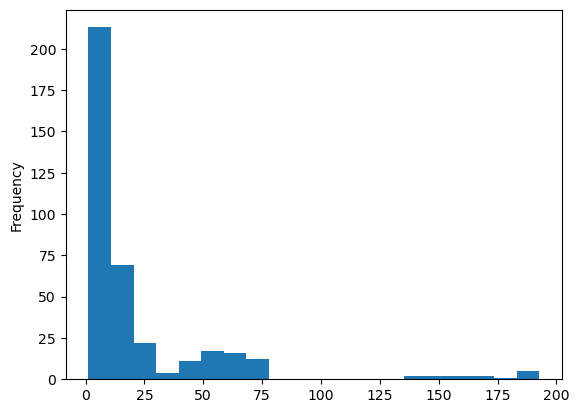

In [111]:
df.loc[df['LandCoverClass'] == 10]['PopDensity'].plot(kind='hist', bins=20)

In [124]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [125]:
df.head()

,Year,District,LandCoverClass,PixelCount,Percentage,LandCoverLabel,Precipitation (mm),GPP,PopDensity,conflict_risk_score
0,2010,Aghorat,7,136,2.051282,Open Shrublands,307.30390,1057.805551,11.537289,0
1,2011,Aghorat,7,168,0.866739,Open Shrublands,183.25092,600.839787,11.797093,0
2,2012,Aghorat,7,130,0.670691,Open Shrublands,294.59027,1148.920891,12.056898,0
3,2013,Aghorat,7,151,0.779033,Open Shrublands,223.23447,852.398537,12.316703,0
4,2014,Aghorat,7,106,0.546871,Open Shrublands,191.02298,762.225361,12.576508,0


In [151]:
features = ['PopDensity', 'LandCoverClass', 'Percentage', 'PixelCount']

X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

c:\Users\azhar\anaconda3\envs\hack\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\azhar\anaconda3\envs\hack\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\azhar\anaconda3\envs\hack\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\azhar\anaconda3\envs\hack\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans 

Text(0.5, 1.0, 'Elbow Method')

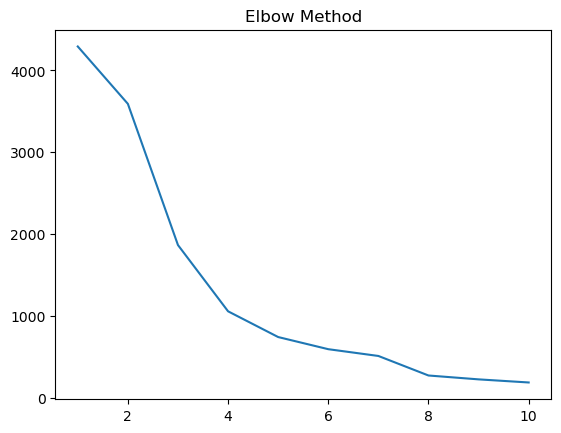

In [152]:
# find best number of clusters

numRange = range(1, 11)

inertia = []
for i in numRange:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    
plt.plot(numRange, inertia)
plt.title('Elbow Method')

In [153]:
kmeans = KMeans(n_clusters=8, random_state=42)
df['cluster_label'] = kmeans.fit_predict(X_scaled)

c:\Users\azhar\anaconda3\envs\hack\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


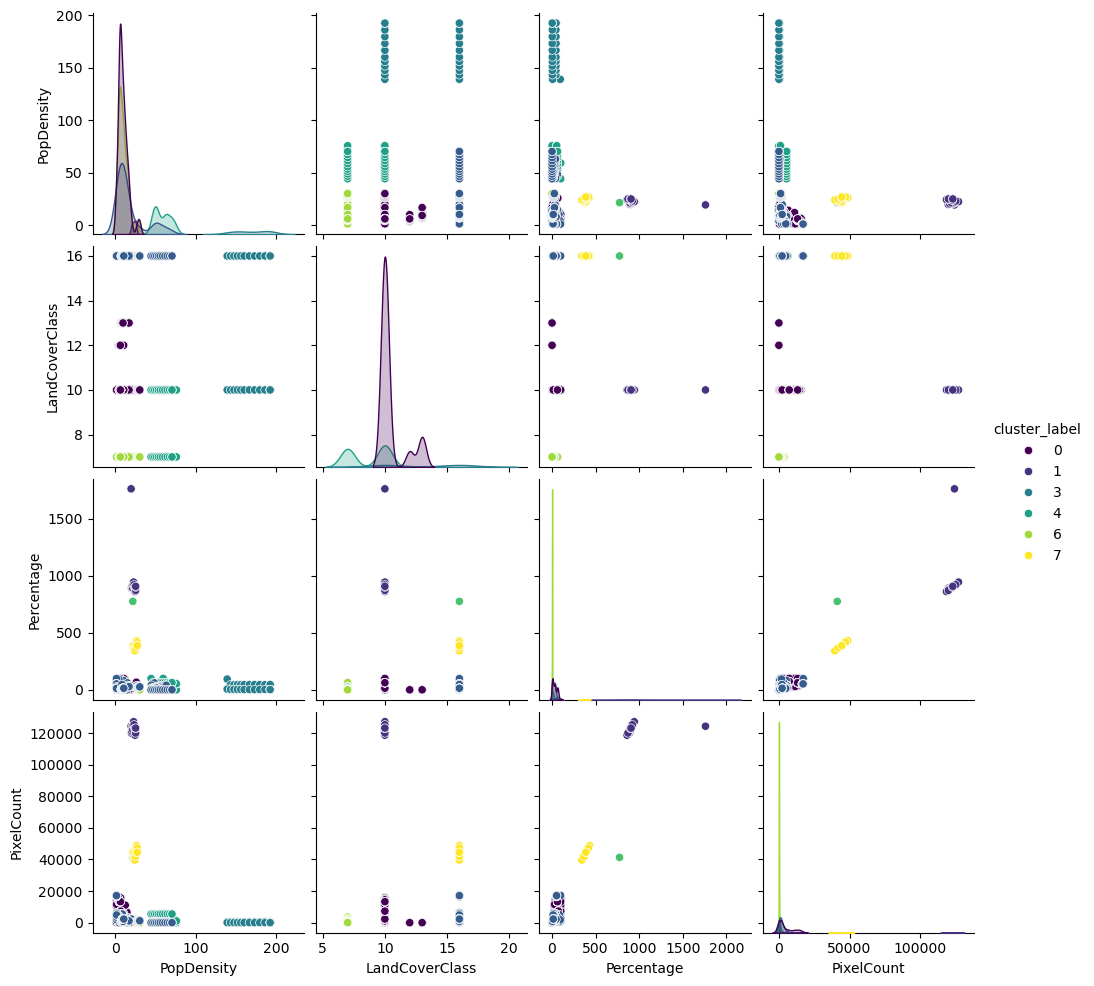

In [154]:
# plot clusters

sns.pairplot(df, hue='cluster_label', vars=features, palette='viridis')

In [163]:
df.head(10)

,Year,District,LandCoverClass,PixelCount,Percentage,LandCoverLabel,Precipitation (mm),GPP,PopDensity,conflict_risk_score,cluster_label
0,2010,Aghorat,7,136,2.051282,Open Shrublands,307.30390,1057.805551,11.537289,0,6
1,2011,Aghorat,7,168,0.866739,Open Shrublands,183.25092,600.839787,11.797093,0,6
2,2012,Aghorat,7,130,0.670691,Open Shrublands,294.59027,1148.920891,12.056898,0,6
3,2013,Aghorat,7,151,0.779033,Open Shrublands,223.23447,852.398537,12.316703,0,6
4,2014,Aghorat,7,106,0.546871,Open Shrublands,191.02298,762.225361,12.576508,0,6
5,2015,Aghorat,7,99,0.510757,Open Shrublands,230.87936,865.736413,12.836312,0,6
6,2016,Aghorat,7,91,0.469484,Open Shrublands,272.00308,1356.479309,13.133139,0,6
7,2017,Aghorat,7,57,0.294072,Open Shrublands,213.04013,508.619578,13.429965,0,6
8,2018,Aghorat,7,32,0.165093,Open Shrublands,218.97380,671.471331,13.726790,0,6
9,2019,Aghorat,7,22,0.113502,Open Shrublands,162.61789,804.706166,14.023617,0,6


In [156]:
df_aggregated_conflict = df.groupby('District').agg(
    Precipitation=('Precipitation (mm)', 'max'),  # Mean of Precipitation
    GPP=('GPP', 'max'),  # Mean of GPP
    PopulationDensity=('PopDensity', 'max'),  # Mean of Population Density
    cluster_label=('cluster_label', 'max')  # Mean of Conflict Risk Score
).reset_index()

# Check the aggregated data
print(df_aggregated_conflict.head())

      District  Precipitation           GPP  PopulationDensity  cluster_label
0      Aghorat      331.05035   1374.157387          14.320443              6
1       Assaba     9574.12000  41006.369446          27.055965              7
2    Barkeiwel      425.15533   1031.153846          63.225662              4
3      Blajmil      527.64136   2294.915013           6.535178              6
4  Bou Lahrath      368.69380   1098.453586           8.517553              6


In [157]:
# shapefile of district

districts = gpd.read_file("Datasets_Hackathon/Admin_layers/Assaba_Districts_layer.shp")

districts = districts.merge(df_aggregated_conflict[['District', 'cluster_label']], left_on='ADM3_EN', right_on='District', how='left')

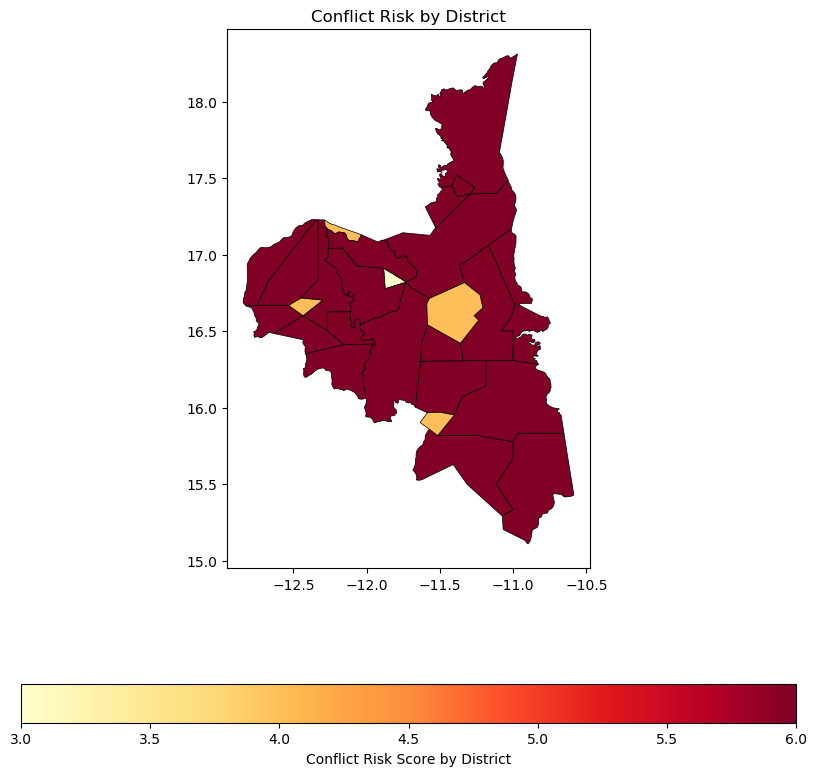

In [158]:
# Plot the choropleth map with proper polygon filling and border separation
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

districts.plot(column='cluster_label', ax=ax, legend=True,
               legend_kwds={'label': "Conflict Risk Score by District", 'orientation': "horizontal"},
               edgecolor='black', linewidth=0.5, cmap='YlOrRd')


# Set the title and show the plot
plt.title('Conflict Risk by District')
plt.show()

In [159]:
# Export the GeoDataFrame to GeoJSON format
districts.to_file("districts_with_conflict_risk.geojson", driver="GeoJSON")


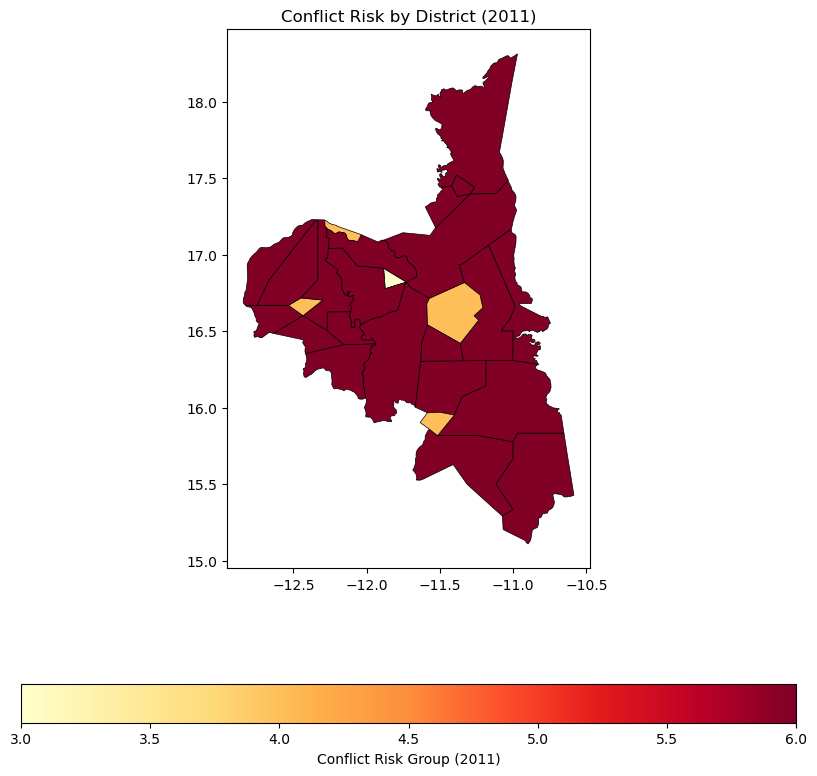

Exported 2011_ConflictChoropleth.geojson


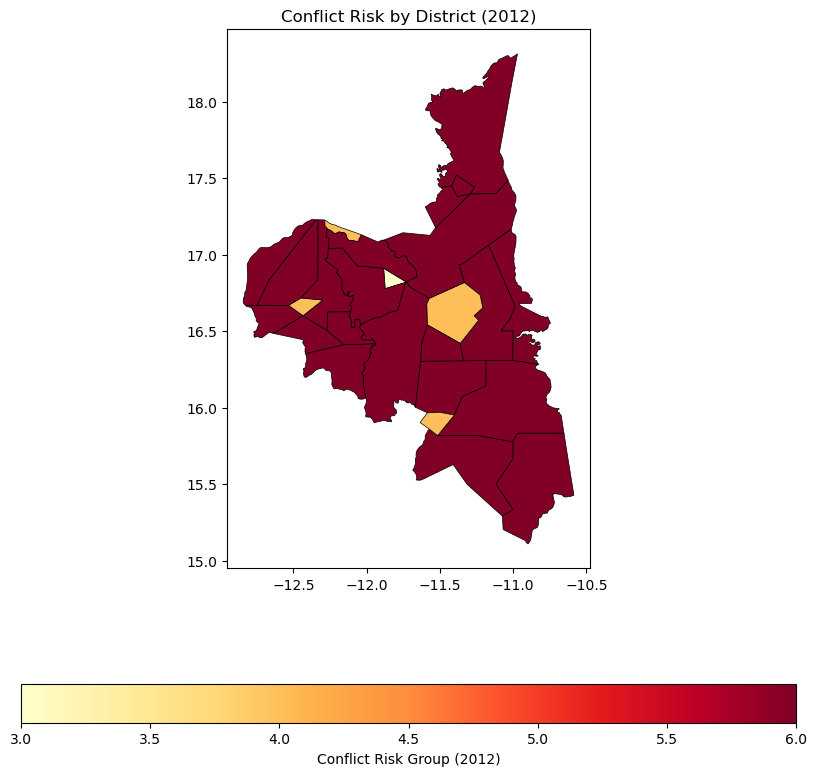

Exported 2012_ConflictChoropleth.geojson


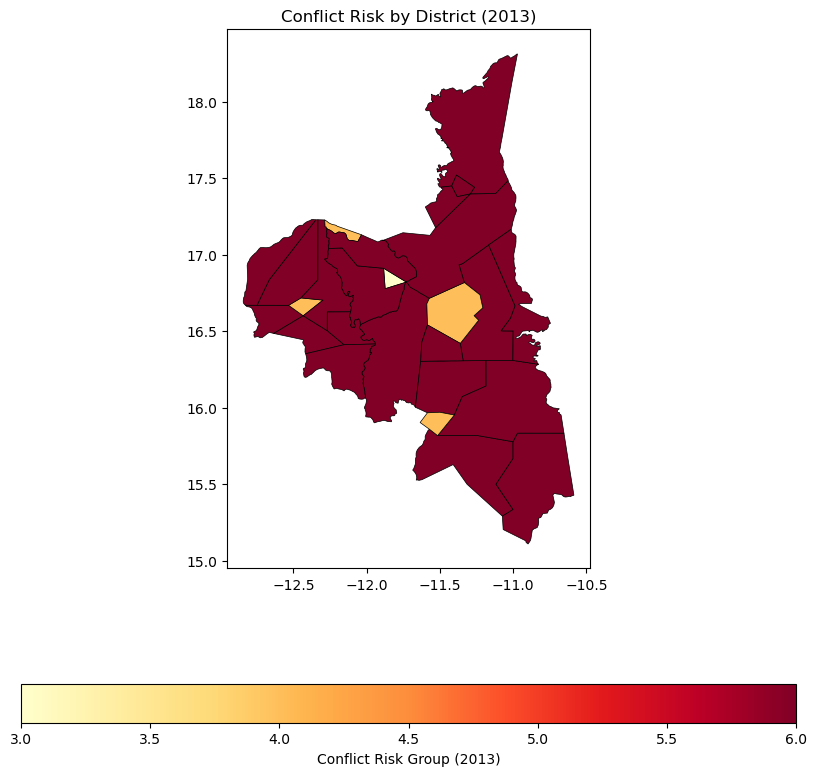

Exported 2013_ConflictChoropleth.geojson


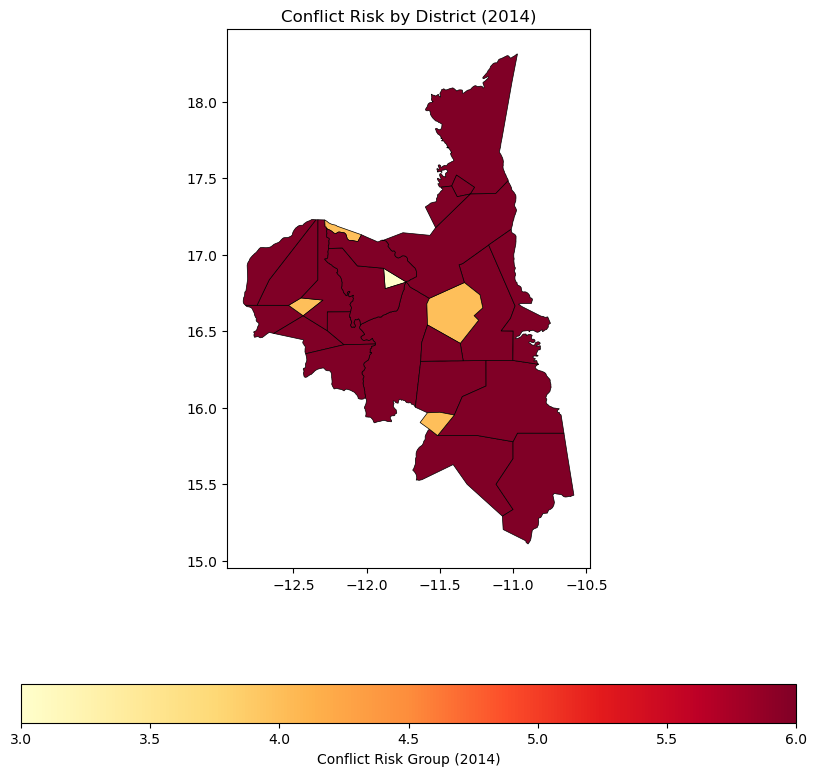

Exported 2014_ConflictChoropleth.geojson


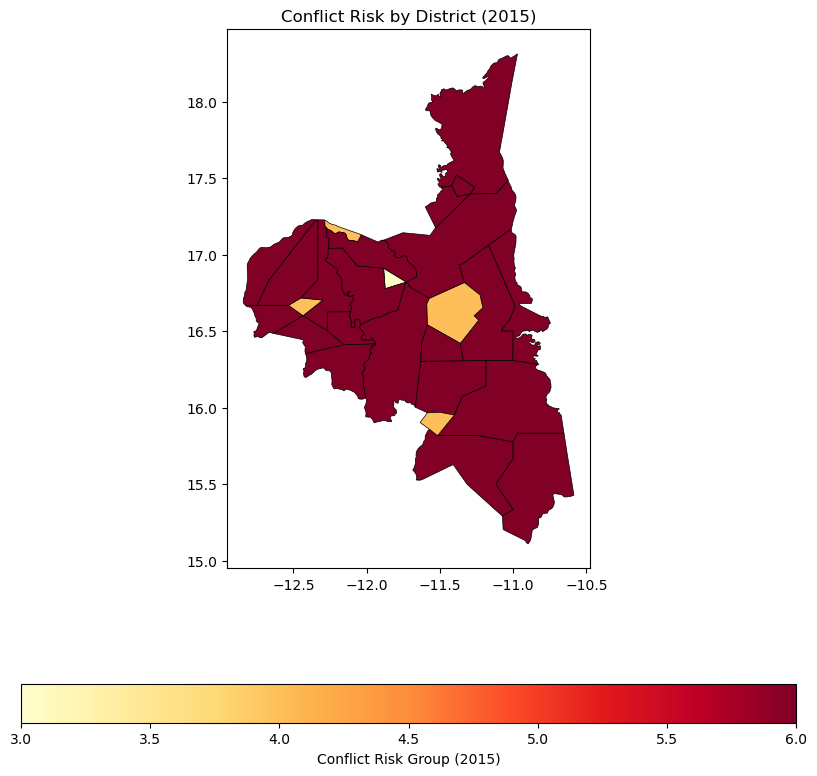

Exported 2015_ConflictChoropleth.geojson


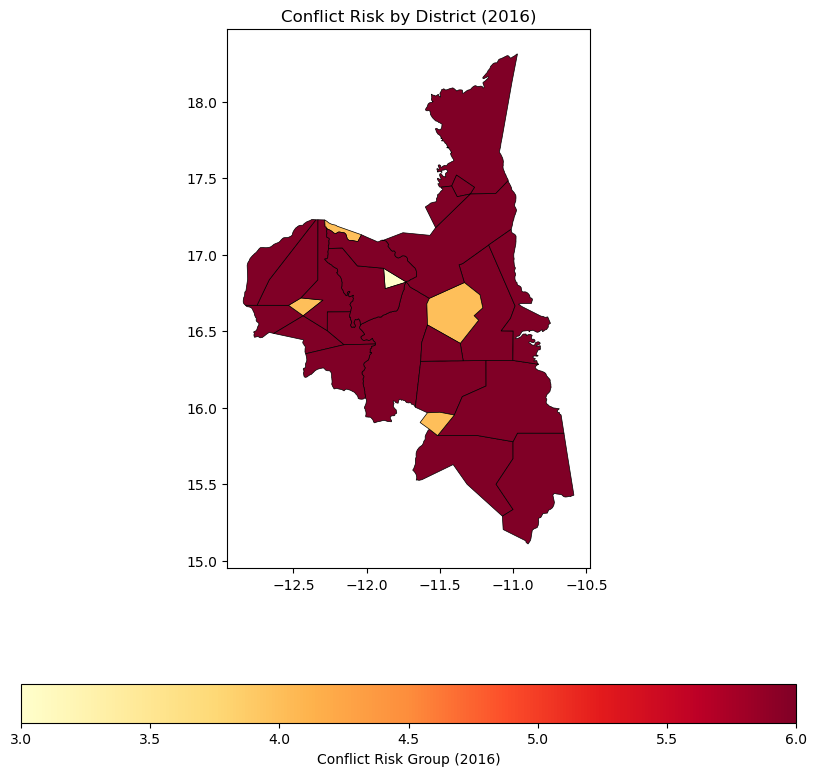

Exported 2016_ConflictChoropleth.geojson


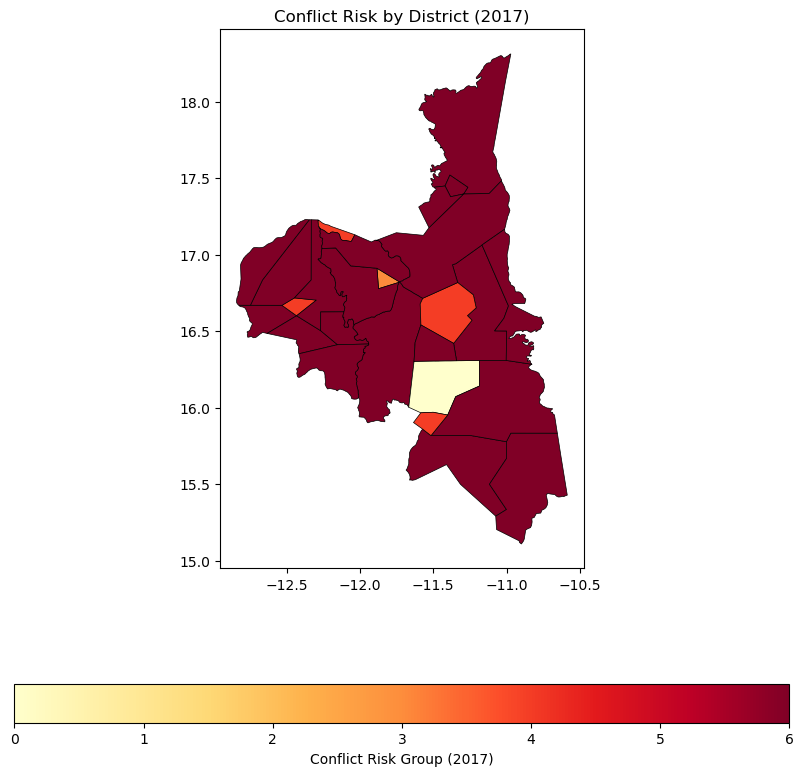

Exported 2017_ConflictChoropleth.geojson


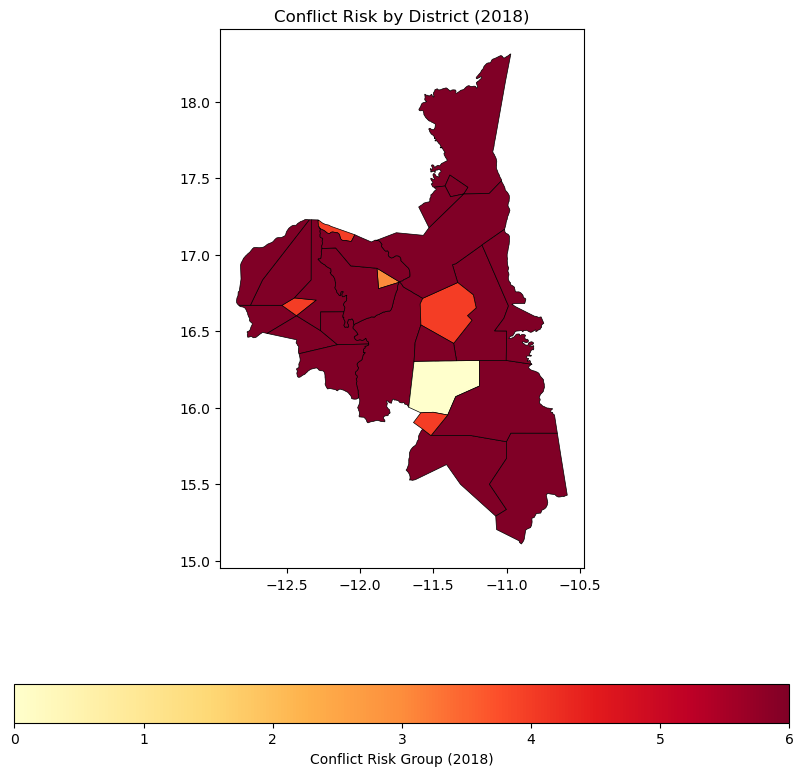

Exported 2018_ConflictChoropleth.geojson


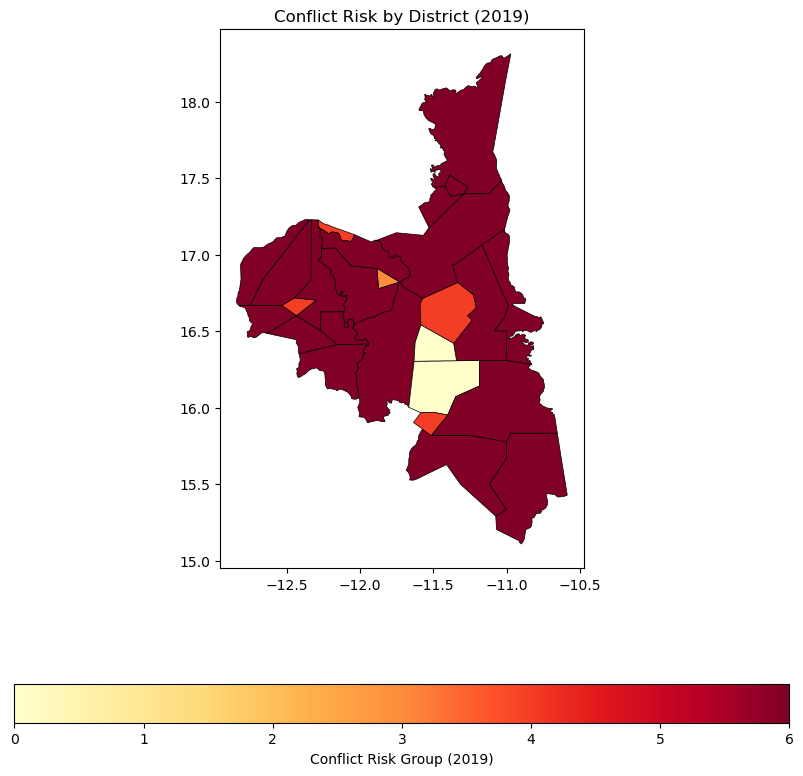

Exported 2019_ConflictChoropleth.geojson


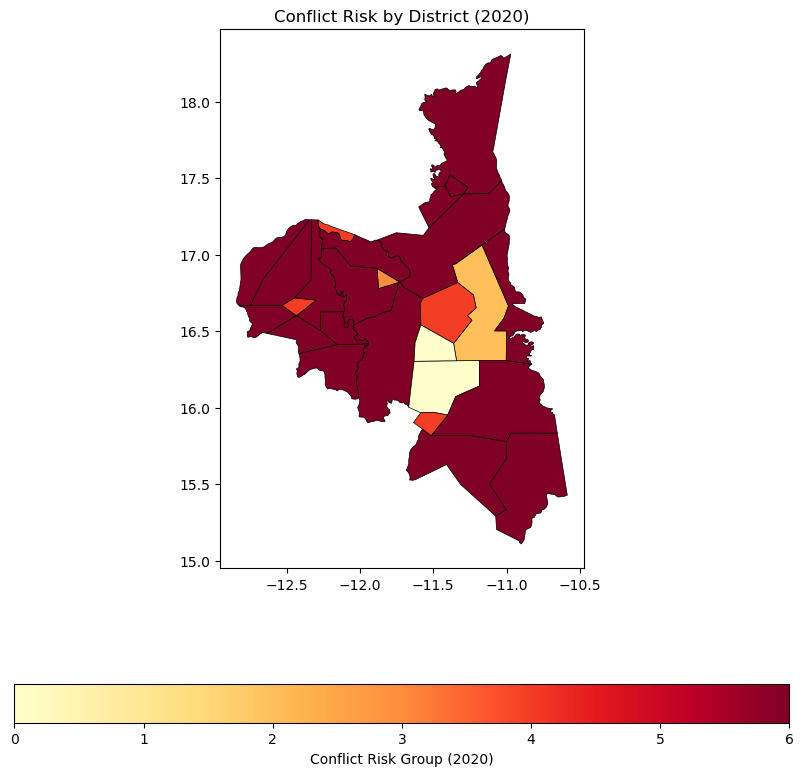

Exported 2020_ConflictChoropleth.geojson


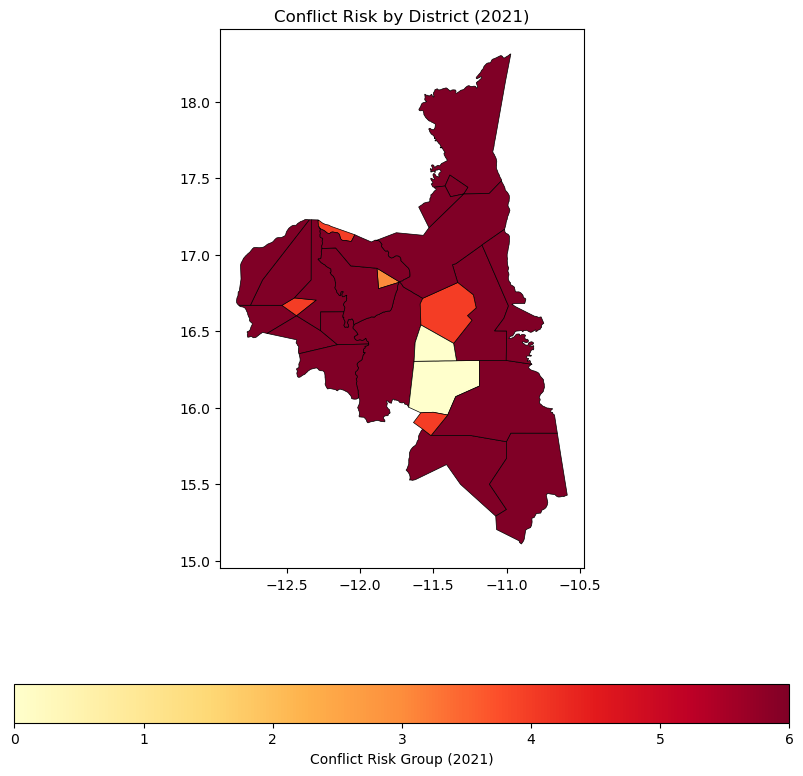

Exported 2021_ConflictChoropleth.geojson


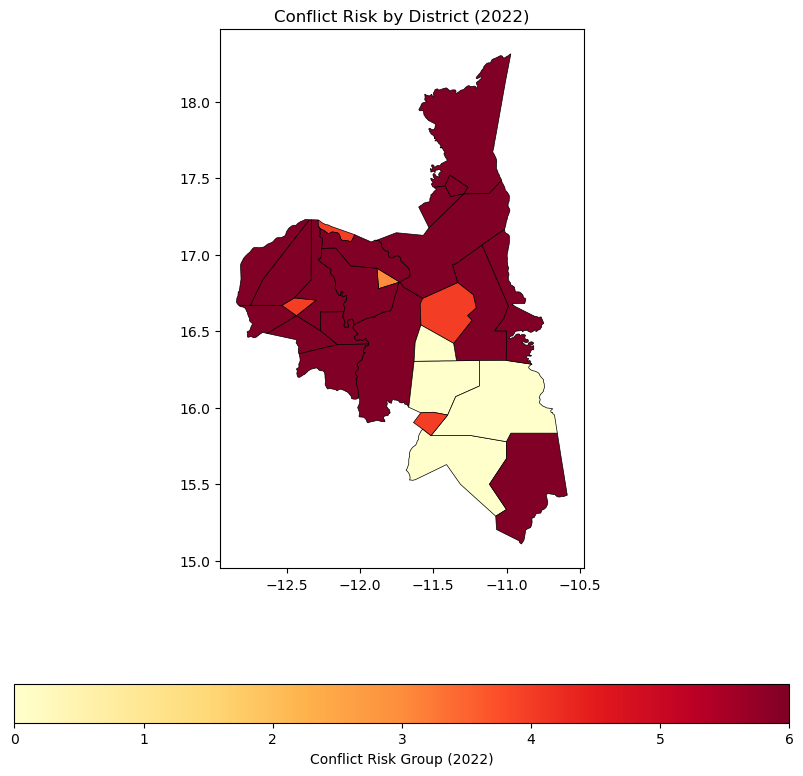

Exported 2022_ConflictChoropleth.geojson


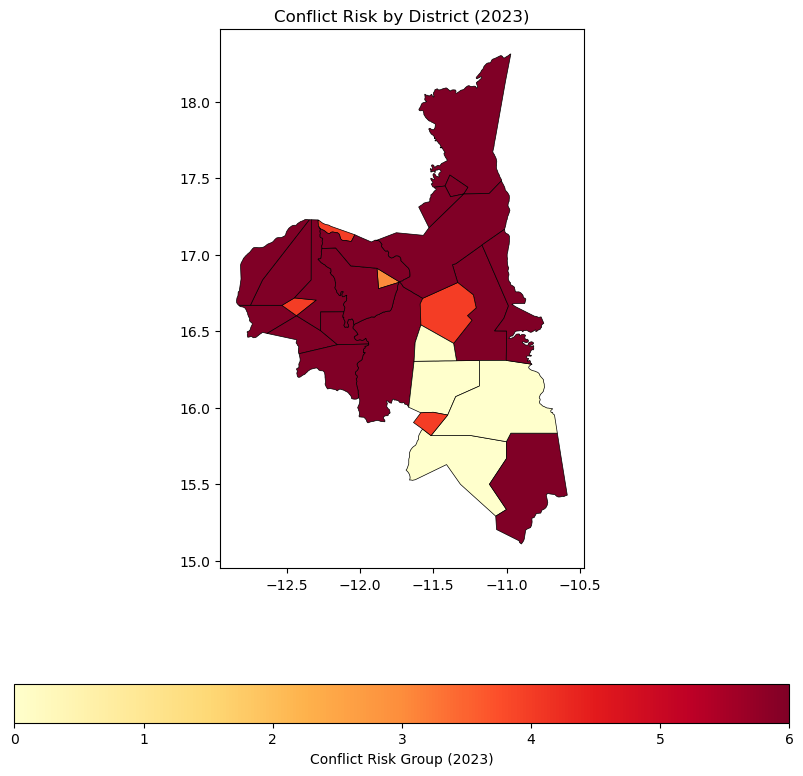

Exported 2023_ConflictChoropleth.geojson


In [162]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile for districts
districts = gpd.read_file("Datasets_Hackathon/Admin_layers/Assaba_Districts_layer.shp")

# Create a list of years you want to process
years = list(range(2011, 2024))

# Loop over each year to aggregate the data and plot
for year in years:
    # Filter data for the current year
    df_year = df[df['Year'] == year]
    
    # Aggregate data for each district per year
    df_aggregated_year = df_year.groupby('District').agg(
        Precipitation=('Precipitation (mm)', 'max'),
        GPP=('GPP', 'max'),
        PopulationDensity=('PopDensity', 'max'),
        cluster_label=('cluster_label', 'max')
    ).reset_index()
    
    # Merge the aggregated data with the district shapefile
    districts_year = districts.merge(df_aggregated_year[['District', 'cluster_label']], 
                                     left_on='ADM3_EN', right_on='District', how='left')
    
    # Plot the choropleth map for the current year
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    districts_year.plot(column='cluster_label', ax=ax, legend=True,
                        legend_kwds={'label': f"Conflict Risk Group ({year})", 'orientation': "horizontal"},
                        edgecolor='black', linewidth=0.5, cmap='YlOrRd')
    
    # Set the title and show the plot
    plt.title(f'Conflict Risk by District ({year})')
    plt.show()
    
    # Export the GeoDataFrame to GeoJSON format for the current year
    geojson_filename = f"{year}_ConflictChoropleth.geojson"
    districts_year.to_file(geojson_filename, driver="GeoJSON")
    print(f"Exported {geojson_filename}")


In [165]:
df.drop(columns=['conflict_risk_score'], inplace=True)

In [166]:
df.to_csv("combined_data_final.csv", index=False)